In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import requests, os, re ,csv, json, glob
import urllib.request
import urllib.parse
import networkx as nx

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import tkinter as tk
from tkinter import filedialog

import datetime

import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/prash/Documents/cyclingdata/usage-data.csv"

In [3]:
df = pd.read_csv(path)

The TfL bike usage data is hosted as a number of CSV files on the website. 

In [4]:
df['File'] = df['File'].str[1:]
# trimming data from 2019 to 2021 (some files from different year are also included)
# given in the problem statement - assuming data start with the file 143JourneyDataExtract02Jan2019-08Jan2019.csv
df = df[67:243]

In [5]:
df.head()

,File,Date,Size,Type
67,143JourneyDataExtract02Jan2019-08Jan2019.csv,"Jan 25th 2019, 10:55:38 am",17.28 MB,CSV file
68,144JourneyDataExtract09Jan2019-15Jan2019.csv,"Jan 25th 2019, 10:55:56 am",20.38 MB,CSV file
69,145JourneyDataExtract16Jan2019-22Jan2019.csv,"Apr 2nd 2019, 01:56:21 pm",19.15 MB,CSV file
70,146JourneyDataExtract23Jan2019-29Jan2019.csv,"Apr 2nd 2019, 01:56:40 pm",18.07 MB,CSV file
71,147JourneyDataExtract30Jan2019-05Feb2019.csv,"Apr 2nd 2019, 01:56:58 pm",16.16 MB,CSV file


In [6]:
df.tail()

,File,Date,Size,Type
238,294JourneyDataExtract01Dec2021-07Dec2021.csv,"Jan 11th 2022, 02:04:46 pm",21.63 MB,CSV file
239,295JourneyDataExtract08Dec2021-14Dec2021.csv,"Jan 11th 2022, 02:04:46 pm",22.33 MB,CSV file
240,296JourneyDataExtract15Dec2021-21Dec2021.csv,"Jan 11th 2022, 02:04:46 pm",19.53 MB,CSV file
241,297JourneyDataExtract22Dec2021-28Dec2021.csv,"Jan 11th 2022, 02:04:50 pm",10.93 MB,CSV file
242,298JourneyDataExtract29Dec2021-04Jan2022.csv,"Jan 11th 2022, 02:04:48 pm",15.91 MB,CSV file


In [7]:
#Create function to pull the csv based on name
def parse_url(l): 
    url = "http://cycling.data.tfl.gov.uk/usage-stats/{}".format(urllib.parse.quote(l[:]))
    print(url)
    urllib.request.urlretrieve(url, l[:])
    print('Done')

In [52]:
# %% time
[parse_url(l) for  l in df['File']]

http://cycling.data.tfl.gov.uk/usage-stats/143JourneyDataExtract02Jan2019-08Jan2019.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/144JourneyDataExtract09Jan2019-15Jan2019.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/145JourneyDataExtract16Jan2019-22Jan2019.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/146JourneyDataExtract23Jan2019-29Jan2019.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/147JourneyDataExtract30Jan2019-05Feb2019.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/148JourneyDataExtract06Feb2019-12Feb2019.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/149JourneyDataExtract13Feb2019-19Feb2019.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/14JourneyDataExtract13Jul2016-19Jul2016.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/150JourneyDataExtract20Feb2019-26Feb2019.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/151JourneyDataExtract27Feb2019-05Mar2019.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/152JourneyDataExtract06Mar20

Done
http://cycling.data.tfl.gov.uk/usage-stats/220JourneyDataExtract24Jun2020-30Jun2020.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/221JourneyDataExtract01Jul2020-07Jul2020.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/222JourneyDataExtract08Jul2020-14Jul2020.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/223JourneyDataExtract15Jul2020-21Jul2020.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/224JourneyDataExtract22Jul2020-28Jul2020.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/225JourneyDataExtract29Jul2020-04Aug2020.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/226JourneyDataExtract05Aug2020-11Aug2020.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/227JourneyDataExtract12Aug2020-18Aug2020.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/228JourneyDataExtract19Aug2020-25Aug2020.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/229JourneyDataExtract26Aug2020-01Sep2020.csv
Done
http://cycling.data.tfl.gov.uk/usage-stats/22JourneyDataExtract07

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [8]:
# Use Tinker to select target folder
# Select the folder where the files are downloaded

root = tk.Tk()
root.withdraw()
dirname = filedialog.askdirectory(initialdir="C:/Users/prash/Documents/cyclingdata",title='Please select a directory')
if len(dirname ) > 0:
    print("The directory is %s" % dirname)

The directory is C:/Users/prash/Documents/cyclingdata


In [9]:
def pullbatch(searchstring):
    all_files = glob.glob(os.path.join(dirname , searchstring))
    l = []
    
    for i, filename in enumerate(all_files):
        # print("Reading ", i , " csv file" )
        df = pd.read_csv(filename, index_col=None, header=0)
        df['filename'] = filename
        df['filename'] = df['filename'].str.replace(dirname,'')
        df['Duration(Min)'] = df['Duration'] / 60.00
        l.append(df)
        # print("Done")
    df_new = pd.concat(l, axis=0, ignore_index=True)
    print("Done")
    return df_new
    

In [10]:
%%time
df2019 = pullbatch("*2019.csv")

Done
CPU times: total: 23.2 s
Wall time: 23.3 s


In [11]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296186 entries, 0 to 10296185
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Rental Id          int64  
 1   Duration           int64  
 2   Bike Id            int64  
 3   End Date           object 
 4   EndStation Id      int64  
 5   EndStation Name    object 
 6   Start Date         object 
 7   StartStation Id    int64  
 8   StartStation Name  object 
 9   filename           object 
 10  Duration(Min)      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 864.1+ MB


In [12]:
%%time
df2020 = pullbatch("*2020.csv")

Done
CPU times: total: 27.5 s
Wall time: 27.6 s


In [13]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10255326 entries, 0 to 10255325
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Rental Id          int64  
 1   Duration           int64  
 2   Bike Id            int64  
 3   End Date           object 
 4   EndStation Id      int64  
 5   EndStation Name    object 
 6   Start Date         object 
 7   StartStation Id    int64  
 8   StartStation Name  object 
 9   filename           object 
 10  Duration(Min)      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 860.7+ MB


In [14]:
%%time
df2021 = pullbatch("*2021.csv")

Done
CPU times: total: 32.9 s
Wall time: 34.2 s


In [15]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10796990 entries, 0 to 10796989
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Rental Id          int64  
 1   Duration           int64  
 2   Bike Id            int64  
 3   End Date           object 
 4   EndStation Id      int64  
 5   EndStation Name    object 
 6   Start Date         object 
 7   StartStation Id    int64  
 8   StartStation Name  object 
 9   filename           object 
 10  Duration(Min)      float64
dtypes: float64(1), int64(5), object(5)
memory usage: 906.1+ MB


In [16]:
# Combine all bike-share data for the tfl, January 2020 up until December 2021
combine_df = [df2019, df2020, df2021]  # List of dataframes
final_df = pd.concat(combine_df)

In [17]:
# Copying data from final_df for later use
df_new = final_df

In [18]:
print(final_df.shape)

final_df.dropna(axis=0, subset=["StartStation Id", "EndStation Id", "Start Date", "End Date"], inplace=True)

print(final_df.shape)

(31348502, 11)
(31348502, 11)


In [19]:
# Cleaning data - drop additional useless columns
final_df = final_df[final_df["StartStation Id"] != final_df["EndStation Id"]]

final_df = final_df.loc[:,('Start Date', 'StartStation Id', 'End Date', 'EndStation Id', 'Duration')]
                           
print(final_df.shape)

(29701434, 5)


In [20]:
## Dropping duplicates
final_df.drop_duplicates(inplace=True)
print(final_df.shape)

(27962570, 5)


In [21]:
final_df.head()

,Start Date,StartStation Id,End Date,EndStation Id,Duration
0,02/01/2019 17:36,197,02/01/2019 17:47,94,660
1,06/01/2019 18:11,269,06/01/2019 18:14,94,180
2,02/01/2019 14:33,5,02/01/2019 14:49,374,960
3,04/01/2019 12:52,94,04/01/2019 12:54,269,120
4,05/01/2019 16:01,94,05/01/2019 16:03,269,120


In [22]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27962570 entries, 0 to 10796989
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Start Date       object
 1   StartStation Id  int64 
 2   End Date         object
 3   EndStation Id    int64 
 4   Duration         int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ GB


In [23]:
final_df['StartStation Id'].value_counts()

191    164244
14     153973
154    145207
374    129448
213    128324
        ...  
753      3381
788      2808
494      2712
752      1180
778        23
Name: StartStation Id, Length: 804, dtype: int64

In [24]:
final_df['EndStation Id'].value_counts()

194    173621
191    164208
14     152464
154    140678
213    128760
        ...  
608      3930
788      2885
494      2841
752       798
778        35
Name: EndStation Id, Length: 804, dtype: int64

In [25]:
# Changing object datatype to datetime data 
# final_df['End Date']= pd.to_datetime(final_df['End Date'])
final_df['Start Date']= pd.to_datetime(final_df['Start Date'])

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27962570 entries, 0 to 10796989
Data columns (total 5 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Start Date       datetime64[ns]
 1   StartStation Id  int64         
 2   End Date         object        
 3   EndStation Id    int64         
 4   Duration         int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.3+ GB


In [27]:
final_df.loc[:, 'year'] = final_df['Start Date'].dt.year
final_df.loc[:, 'month'] = final_df['Start Date'].dt.month
final_df.loc[:, 'week'] = final_df['Start Date'].dt.isocalendar().week
final_df.loc[:, 'day'] = final_df['Start Date'].dt.day
final_df.loc[:, 'hour'] = final_df['Start Date'].dt.hour
final_df.loc[:, 'dayofweek'] = final_df['Start Date'].dt.dayofweek
final_df.loc[:, 'satsun'] = final_df['dayofweek'].map({0: False, 1: False, 2: False, 3: False, 4: False, 5: True, 6:True})
final_df.shape

(27962570, 12)

<AxesSubplot:xlabel='hour'>

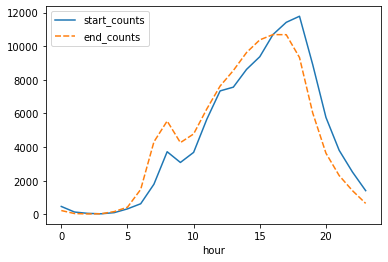

In [28]:
weekday_191_start = final_df.loc[(final_df['StartStation Id'] == 191) & (final_df['satsun'] == False)]
weekday_191_end = final_df.loc[(final_df['EndStation Id'] == 191) & (final_df['satsun'] == False)]
weekday_191_start = weekday_191_start.groupby('hour').count()
weekday_191_end = weekday_191_end.groupby('hour').count()
weekday_191_data = pd.DataFrame({'start_counts' : weekday_191_start.iloc[:,0],
                                'end_counts' : weekday_191_end.iloc[:,0]})

sns.lineplot(data=weekday_191_data)

In [34]:
weekend_191_start = final_df.loc[(final_df['StartStation Id'] == 191) & (final_df['satsun'] == True)]
weekend_191_end = final_df.loc[(final_df['EndStation Id'] == 191) & (final_df['satsun'] == True)]
weekdend_191_start = weekend_191_start.groupby('hour').count()
weekend_191_end = weekend_191_end.groupby('hour').count()
weekend_191_data = pd.DataFrame({'start_counts_' : weekend_191_start.iloc[:,0],
                                'end_counts_' : weekend_191_end.iloc[:,0]})

sns.lineplot(data=weekend_191_data)

ValueError: cannot reindex on an axis with duplicate labels

<AxesSubplot:xlabel='month', ylabel='Start Date'>

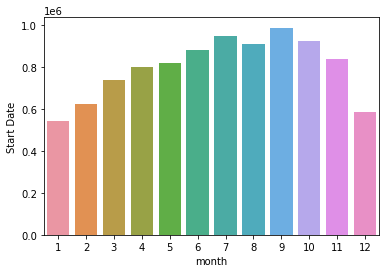

In [29]:
# number of rental events in the months of a year 2021
import seaborn as sns
per_month_2021_group = final_df.loc[final_df['year'] == 2021].groupby('month')
month_counts = per_month_2021_group.count()

sns.barplot(x=month_counts.index, y=month_counts.iloc[:,0])

<AxesSubplot:xlabel='month', ylabel='Start Date'>

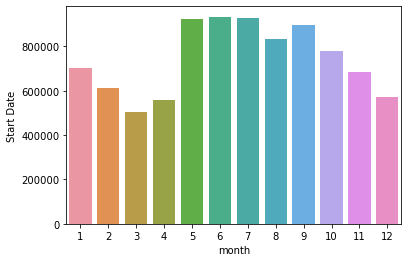

In [30]:
# number of rental events in the months of a year 2020
import seaborn as sns
per_month_2020_group = final_df.loc[final_df['year'] == 2020].groupby('month')
month_counts = per_month_2020_group.count()

sns.barplot(x=month_counts.index, y=month_counts.iloc[:,0])

In [26]:
station_pair_group = df_new.groupby(['StartStation Name', 'EndStation Name'])
station_pair_count = station_pair_group.count().iloc[:,0]

In [27]:
total_by_start_station = station_pair_count.groupby('StartStation Name').sum()
rel_weight = 100.0 * station_pair_count.div(total_by_start_station, level=0)

In [28]:
rel_weight = rel_weight.loc[rel_weight > 1.0]

<AxesSubplot:>

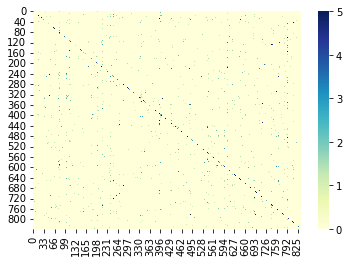

In [29]:
stations = np.union1d(df_new['StartStation Name'].unique(), df_new['EndStation Name'].unique())

mindex_square = pd.MultiIndex.from_product([stations, stations])

rel_weight_square = rel_weight.reindex(index=mindex_square, fill_value=0.0)

rel_weight_square = rel_weight_square.unstack()

sns.heatmap(rel_weight_square.values, vmin=0.0, vmax=5.0, cmap="YlGnBu")

In [30]:
# directed weighted graph as a DiGraph instance from the networkx library
dg = nx.DiGraph()
dg.add_nodes_from(stations)

In [31]:
edge_weights_dict = rel_weight.to_dict()

edge_weights_data = [(key1, key2, val) for (key1, key2), val in edge_weights_dict.items()]

dg.add_weighted_edges_from(edge_weights_data)

In [32]:
node_clusterings = nx.algorithms.cluster.clustering(dg)

sorted(node_clusterings.items(), key=lambda kv: kv[1])

[('Canada Water Station', 0),
 ('Clarges Street, Mayfair', 0),
 ('Clifford Street, Mayfair', 0),
 ('Eaton Square (South), Belgravia', 0),
 ('Eaton Square, Belgravia', 0),
 ('Farringdon Lane, Clerkenwell', 0),
 ('Grafton Street, Mayfair', 0),
 ('Sackville Street, Mayfair', 0),
 ('Farringdon Street, Holborn', 0.023809523809523808),
 ("Belgrove Street , King's Cross", 0.026466621712744436),
 ('Cardinal Place, Victoria', 0.02727272727272727),
 ('Endsleigh Gardens, Euston', 0.029304029304029304),
 ('Craven Street, Strand', 0.029953917050691243),
 ('Wansey Street, Walworth', 0.030721966205837174),
 ('Waterloo Station 3, Waterloo', 0.03154159547903798),
 ('Allington Street, Victoria', 0.03355704697986577),
 ('Frith Street, Soho', 0.03571428571428571),
 ('Waterloo Station 1, Waterloo', 0.03663423010875787),
 ('South Wharf Road, Paddington', 0.037848605577689244),
 ("St. James's Square, St. James's", 0.03838383838383838),
 ('Melton Street, Euston', 0.040229885057471264),
 ('Boston Place, Maryle

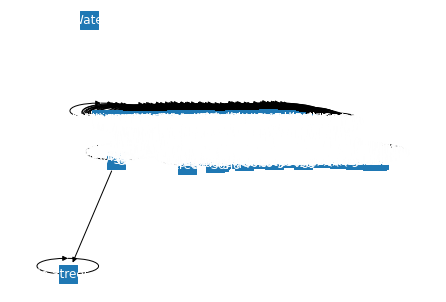

In [33]:
nx.draw(dg, with_labels = True, font_color = 'white', node_shape='s')

In [34]:
all_locs = pd.read_csv("C:/Users/prash/Documents/cyclingdata/bike_point_locations_saved.csv")
print(all_locs.shape)
all_locs.head()

(790, 5)


,name,id,lat,lon,capacity
0,"River Street , Clerkenwell",1,51.529163,-0.109971,19
1,"Phillimore Gardens, Kensington",2,51.499607,-0.197574,37
2,"Christopher Street, Liverpool Street",3,51.521284,-0.084606,32
3,"St. Chad's Street, King's Cross",4,51.530059,-0.120974,23
4,"Sedding Street, Sloane Square",5,51.493130,-0.156876,27


I calculate the full set of unique routes actually made within the entire usage data, 
so that I can then run these unique routes through my journey planner. 
I get around 400k unique routes made - out of a total possible of around 600k (777 * 776).

In [35]:
## Generate list of unique routes
unq_locs = df_new.loc[:,('StartStation Id',
                      'EndStation Id')]
print(unq_locs.shape)
unq_locs.drop_duplicates(inplace=True)
print(unq_locs.shape)

(31197242, 2)
(516120, 2)


In [36]:
## Merge on the lat/lons

unq_locs = unq_locs.merge(right = all_locs,
                             how = 'inner',
                             left_on = 'StartStation Id',
                             right_on = 'id')

print(unq_locs.shape)

unq_locs.drop(labels = ["id", "name"], axis=1, inplace=True)
unq_locs.rename(columns={'lat': 'StartStation lat', 'lon': 'StartStation lon', 
                            'capacity': 'StartStation capacity'},
                   inplace=True)

(508145, 7)


In [37]:
# Merge end
unq_locs = unq_locs.merge(right = all_locs,
                             how = 'inner',
                             left_on = 'EndStation Id',
                             right_on = 'id')

unq_locs.drop(labels = ["id", "name"], axis=1, inplace=True)
unq_locs.rename(columns={'lat': 'EndStation lat', 'lon': 'EndStation lon',
                           'capacity': 'EndStation capacity'},
                   inplace=True)


print(unq_locs.shape)
unq_locs.head()

(500266, 8)


,StartStation Id,EndStation Id,StartStation lat,StartStation lon,StartStation capacity,EndStation lat,EndStation lon,EndStation capacity
0,197.0,94,51.505569,-0.111607,27,51.495061,-0.085814,28
1,269.0,94,51.500823,-0.089741,46,51.495061,-0.085814,28
2,5.0,94,51.493130,-0.156876,27,51.495061,-0.085814,28
3,94.0,94,51.495061,-0.085814,28,51.495061,-0.085814,28
4,102.0,94,51.513407,-0.076793,17,51.495061,-0.085814,28


In [38]:
unq_locs_det = unq_locs.loc[:,('StartStation Id',
                               'EndStation Id',
                               'StartStation lat',
                               'StartStation lon',
                               'EndStation lat',
                               'EndStation lon')]